<h2 id="Contents">Contents<a href="#Contents"></a></h2>
        <ol>
        <li><a class="" href="#Simple-Linear-Regression">Simple Linear Regression</a></li>
<ol><li><a class="" href="#Estimating-the-Coefficients">Estimating the Coefficients</a></li>
<li><a class="" href="#Assessing-the-Accuracy-of-the-Model">Assessing the Accuracy of the Model</a></li>
<ol><li><a class="" href="#Residual-Standard-Error">Residual Standard Error</a></li>
<li><a class="" href="#$R^2$-Statistic">R^2 Statistic</a></li>
</ol><li><a class="" href="#Multiple-Linear-Regression">Multiple Linear Regression</a></li>
<ol><li><a class="" href="#Estimating-the-Regression-Coefficients">Estimating the Regression Coefficients</a></li>
<li><a class="" href="#Removing-the-Additive-Assumption">Removing the Additive Assumption</a></li>
<li><a class="" href="#Removing-the-Linear-Assumption">Removing the Linear Assumption</a></li>
</ol><li><a class="" href="#Potential-Problems">Potential Problems</a></li>
</ol>

# Simple Linear Regression

In linear regression we assume that there is approximately a linear
relationship between X and Y where Y is the equantity we are trying to predict using X. Mathematicaly, we can write the equation of the line as:
$$ Y \approx \beta_0 + \beta_1 X $$
We will sometimes
describe this by saying that we are regressing Y on X (or Y onto X). In above $\beta_0$ and $\beta_1$ are two unknown constants that represent
the intercept and slope terms in the linear model. Together, $\beta_0$ and $\beta_1$ are
intercept
known as the model *coefficients* or *parameters*. Once we have the coefficients, we can use them to predict Y.

## Estimating the Coefficients

Let
$$ (x_1, y_1), (x_2, y_2), \dots, (x_n, y_n) $$
represent n observation pairs, each of which consists of a measurement
of X and a measurement of Y . In the Advertising example, this data
set consists of the TV advertising budget and product sales in n = 200
different markets. 

Our
goal is to obtain coefficient estimates $\hat{\beta_0}$ and $\hat{\beta_1}$ such that the linear model fits the available data well—that is, so that $y_i ≈ \hat{\beta_0} + \hat{\beta_1}x_i$ for $i =1, \ldots , n$. This is done by minimizing the least squares error, or the sum of the squares of the residuals.

Let $ \hat{y_i} = \hat{\beta_0} + \hat{\beta_1} $ be the predictions for the $i$th observation. We define the residual as
$ e_i = y_i - \hat{y_i} $ then the sum of the squares of the residuals is
$$ RSS =  \sum_{i=1}^n (e_i)^2 = \sum_{i=1}^n (y_i - \hat{y_i})^2 $$
Using calculus, we can show that the sum of the squares of the residuals is minized when
$$
\begin{align*}
\hat{\beta_0} &= \frac{\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n(x_i - \bar{x})^2} \\
\hat{\beta_1} &= \bar{y} - \hat{\beta_1}\bar{x} \\
\end{align*}
$$
Here, $\bar{x}$ and $\bar{y}$ are the mean values of $x_i$ and $y_i$ respectively.

![](images/03_01.png)

The figure displays the simple linear regression fit to the Advertising
data.

Let's see how this works in code!

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("data\Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [10]:
#Setting global parameters
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 14
sns.set_theme(style="whitegrid")

In [17]:
# Calculating beta0 and beta1
tv = df["TV"]
tv_mean = tv.mean()
sales = df["sales"]
sales_mean = sales.mean()

beta1 = np.sum((tv - tv_mean) * (sales - sales_mean)) / np.sum((tv - tv_mean) ** 2)
beta0 = sales_mean - beta1 * tv_mean
beta0, beta1

(7.032593549127698, 0.047536640433019736)

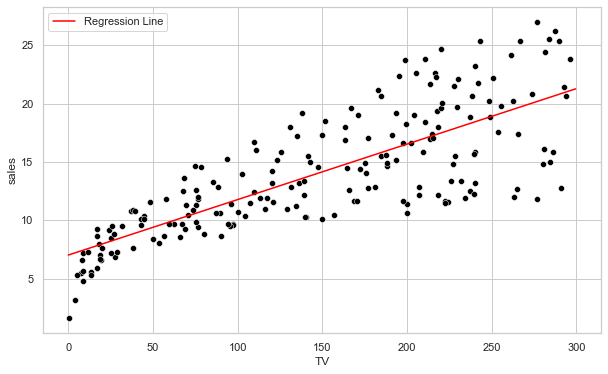

In [20]:
#plotting the linear regression line
x = np.arange(0, 300, 0.5)
y = beta0 + beta1 * x
sns.scatterplot(x="TV", y="sales", data=df, color="black")
plt.plot(x, y, color='red', label='Regression Line')
plt.legend();

>*Null hypothesis:* There is no relationship between X and Y.
<br>
*Alternative hypothesis:* There is a relationship between X and Y.

## Assessing the Accuracy of the Model

The quality of a linear regression fit is typically assessed
using two related quantities: the residual standard error (RSE) and the R2
R2
statistic.

### Residual Standard Error

RSE is the average amount that the response
will deviate from the true regression line. It is computed using the formula
$$
RSE = \sqrt{\frac{1}{n-2} \sum_{i=1}^n (y_i - \hat{y_i})^2}
$$

### $R^2$ Statistic

The RSE provides an absolute measure of lack of fit of the model to the data. But since it is measured in the units of Y , it is not always
clear what constitutes a good RSE. The $R^2$ statistic provides an alternative
measure of fit. It takes the form of a proportion—the proportion of variance
explained—and so it always takes on a value between 0 and 1, and is
independent of the scale of Y. To calculate $R^2$, we use the formula:
$$
R^2 = 1 - \frac{RSS}{TSS}
$$
where $RSS$ is the residual sum of squares and $TSS$ is the total sum of squares, $TSS = \sum_{i=1}^n (y_i - \bar{y})^2$

## Multiple Linear Regression

Simple linear regression is a useful approach for predicting a response on the
basis of a single predictor variable. However, in practice we often have more
than one predictor. One approach to this is to use a linear regression model for each predictor. However, this approach is not very satisfactory because it is not clear how to combine the individual linear regression models into a single model to make a prediction. Instead, we extend the simple linear regression model to multiple linear regression:
$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_p X_p
$$

> We can interpret $\beta_j$ as the average
effect on $Y$ of a one unit increase in $X_j$, holding all other predictors fixed.

In rge advertising example, this gives:
$$
\text{sales} = \beta_0 + \beta_1 \text{ TV}+ \beta_2 \text{ radio} + \beta_3 \text{ newspaper}
$$

### Estimating the Regression Coefficients

The parameters are estimated using the same least squares approach that
we saw in the context of simple linear regression. We choose $ \beta_0, \beta_1, \dots \beta_p $
to minimize the sum of squared residuals.
$$
\begin{align*}
RSS &= \sum_{i=1}^n (y_i - \hat{y_i})^2\\
    &= \sum_{i=1}^n (y_i - \hat{\beta_0} - \hat{\beta_1} x_1 - \hat{\beta_2} x_2 - \dots - \hat{\beta_p} x_p)^2
\end{align*}    
$$

The values $\hat{\beta_0}, \hat{\beta_1}, \dots \hat{\beta_p}$ that minimize the sum of squared residuals are the coefficients of the linear regression model.

The multiple regression coefficient estimates have
somewhat complicated forms that are most easily represented using matrix algebra. One can use any statistical software package to calculate the coefficient estimates.

>**The additive and linear assumptions of the linear model:** The additive assumption means that the effect of changes in a predictor $X_j$ on the response $Y$ is
independent of the values of the other predictors. The linear assumption
states that the change in the response $Y$ due to a one-unit change in $X_j$ is
constant, regardless of the value of $X_j$.
Bothe of these assumptions are not very sophisticated, and are often not valid in real life.

### Removing the Additive Assumption

The additive assumption can be removed by adding interaction terms to the model. For example, a linear model in the form of:
$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \epsilon
$$
may be extended to the form:
$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_1 X_2 + \epsilon
$$

### Removing the Linear Assumption

A very simple way to directly extend the linear model
to accommodate non-linear relationships, using polynomial regression. In this case, the model is extended to the form:
$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_1^2 + \beta_4 X_2^2+ \beta_5X_1X_2 + \epsilon
$$

## Potential Problems

Some very common problems in linear regression are:
1. **Non-linearity of the response-predictor relationships**.
2. **Correlation of error terms**.
3. **Non-constant variance of error terms**.
4. **Outliers**.
5. **High-leverage points**.
6. **Collinearity** (Two or more predictor variables are closely related to one another).

>*Parametric and non-parametric models:* Parametric models assume that the relationship between the response and the predictor variables has a form $f(X)$. Non-parametric models assume that the relationship between the response and the predictor variables are not in this form.